**1. Download the dataset**

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import cv2
import seaborn as sn
import matplotlib.pyplot as plt


In [60]:
%matplotlib inline

**2. Image Augmentation**

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
data = ImageDataGenerator(rescale = 1.0/225, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False, validation_split = 0.25)

In [63]:
data2 = data.flow_from_directory('/content/drive/MyDrive/flowers', target_size=(224,224), class_mode = 'categorical', subset= 'training')

Found 3246 images belonging to 5 classes.


In [64]:
data3 = data.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(224,224),class_mode = 'categorical', subset = 'validation')

Found 1081 images belonging to 5 classes.


In [65]:
data2.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [66]:
data3.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

**3.Create Model**

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [68]:
model = Sequential()

**4. Adding Layers**

In [69]:
model.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))

In [70]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [71]:
model.add(Flatten())

In [72]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [73]:
model.add(Dense(5,activation='softmax'))

**5. Compiling the model**

In [74]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**6. Fitting the model**

In [75]:
model.fit(data2,steps_per_epoch=len(data2),validation_data=data3,validation_steps=len(data3),epochs=15)

Epoch 1/15
102/102 [==============================] - 143s 1s/step - loss: 3.9700 - accuracy: 0.4153 - val_loss: 1.1835 - val_accuracy: 0.5217
Epoch 2/15
102/102 [==============================] - 141s 1s/step - loss: 1.0930 - accuracy: 0.5742 - val_loss: 1.1193 - val_accuracy: 0.5486
Epoch 3/15
102/102 [==============================] - 145s 1s/step - loss: 0.9966 - accuracy: 0.6198 - val_loss: 1.0659 - val_accuracy: 0.5809
Epoch 4/15
102/102 [==============================] - 142s 1s/step - loss: 0.9294 - accuracy: 0.6389 - val_loss: 1.1639 - val_accuracy: 0.5319
Epoch 5/15
102/102 [==============================] - 142s 1s/step - loss: 0.8896 - accuracy: 0.6577 - val_loss: 1.0806 - val_accuracy: 0.6031
Epoch 6/15
102/102 [==============================] - 141s 1s/step - loss: 0.8353 - accuracy: 0.6802 - val_loss: 1.1275 - val_accuracy: 0.6050
Epoch 7/15
102/102 [==============================] - 146s 1s/step - loss: 0.7920 - accuracy: 0.6975 - val_loss: 1.0583 - val_accuracy: 0.6189

**7. Saving the model**

In [76]:
model.save('flowers.h5')

**8. Testing the model**

**Test 1**

In [77]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [78]:
model = load_model('flowers.h5')

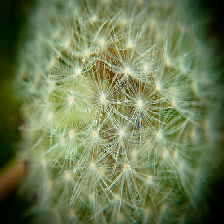

In [79]:
img1 = image.load_img('/content/drive/MyDrive/flowers/dandelion/10437652486_aa86c14985.jpg',target_size=(224,224))
img1

In [80]:
arr1 = image.img_to_array(img1)


In [81]:
dim1 = np.expand_dims(arr1,axis=0)


In [82]:
temp1=np.argmax(model.predict(dim1),axis=1)


In [83]:
index = ['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [84]:
index[temp1[0]]

'Dandelion'

**Test 2**

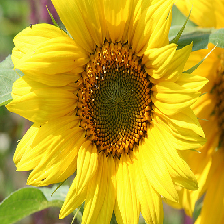

In [85]:
img2 = image.load_img('/content/drive/MyDrive/flowers/sunflower/9610374042_bb16cded3d.jpg',target_size=(224,224))
img2

In [86]:
arr2 = image.img_to_array(img2)


In [87]:
dim2 = np.expand_dims(arr2,axis=0)


In [88]:
temp2 = np.argmax(model.predict(dim2),axis=1)


In [89]:
index[temp2[0]]

'Sunflower'

**Test 3**

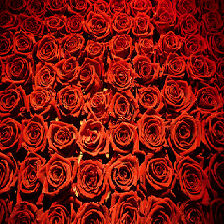

In [90]:
img3 = image.load_img('/content/drive/MyDrive/flowers/rose/388405293_4db1d71f21_n.jpg',target_size=(224,224))
img3

In [91]:
arr3 = image.img_to_array(img3)


In [92]:
dim3 = np.expand_dims(arr3,axis=0)


In [93]:
temp3 = np.argmax(model.predict(dim3),axis=1)


In [94]:
index[temp3[0]]

'Tulip'

**Test 4**

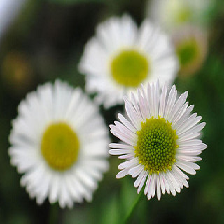

In [95]:
img4 = image.load_img('/content/drive/MyDrive/flowers/daisy/5794839_200acd910c_n.jpg',target_size=(224,224))
img4

In [96]:
arr4 = image.img_to_array(img4)


In [97]:
dim4 = np.expand_dims(arr4,axis=0)


In [98]:
temp4 = np.argmax(model.predict(dim4),axis=1)


In [99]:
index[temp4[0]]

'Daisy'

**Test 5**

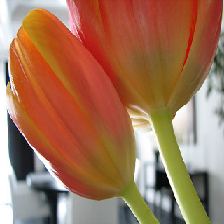

In [100]:
img5 = image.load_img('/content/drive/MyDrive/flowers/tulip/65347450_53658c63bd_n.jpg',target_size=(224,224))
img5

In [101]:
arr5 = image.img_to_array(img5)


In [102]:
dim5 = np.expand_dims(arr5,axis=0)


In [103]:
temp5 = np.argmax(model.predict(dim5),axis=1)


In [104]:
index[temp5[0]]

'Tulip'